In [1]:
library(parsedate)

Read the stats from the CSV file, prevent quotes to interfere

In [2]:
data <- read.csv("stats.csv", stringsAsFactors=FALSE, sep=",", quote="")

Plot the results (for now using plot() as qqplot() was not that easy to use)

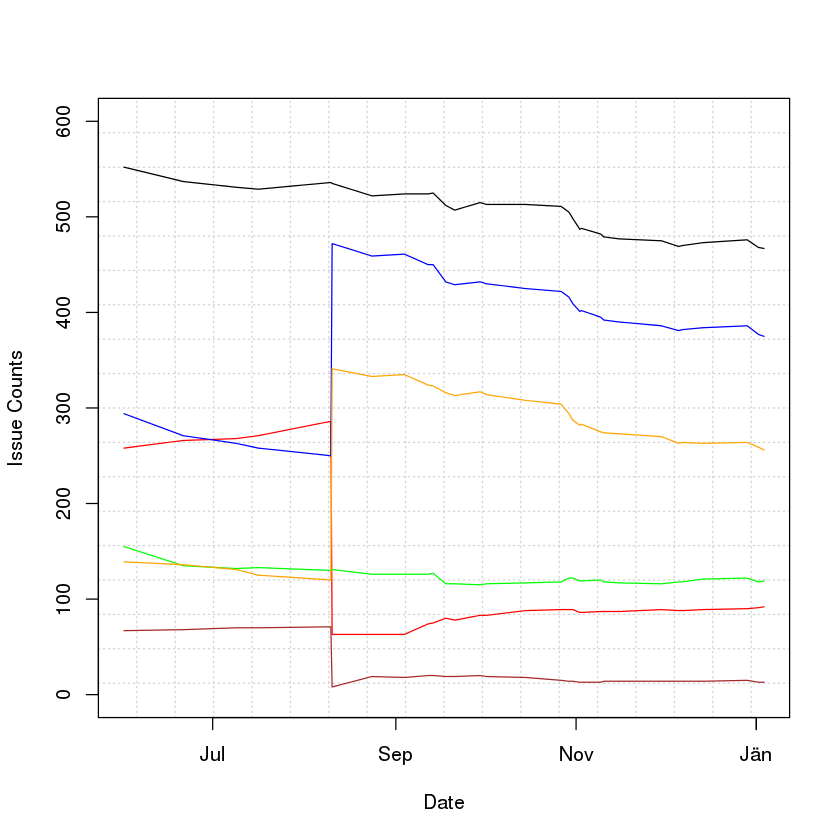

In [3]:
plot(parse_date(data$Date, approx = TRUE), data$Open.overall, type="l", 
    ylim=c(0, 600), panel.first = grid(18, 18), xlab="Date", ylab="Issue Counts")
lines(parse_date(data$Date, approx = TRUE), data$Enhancements, col="red")
lines(parse_date(data$Date, approx = TRUE), data$Actual.bugs, col="blue")
lines(parse_date(data$Date, approx = TRUE), data$Needinfo, col="green")
lines(parse_date(data$Date, approx = TRUE), data$Workable.bugs, col="orange")
lines(parse_date(data$Date, approx = TRUE), data$Bugs.with.patch, col="brown")

# Below is dumpheap

In [4]:
data

,Date,Timestamp,Bugs.overall,Open.overall,Enhancements,Actual.bugs,Needinfo,Workable.bugs,Bugs.with.patch,Opened.last.week,Changed.last.week,Closed.last.week,Distribution
1,2015-05-31 23:44,0,3362,552,258,294,155,139,67,0,0,0,{}
2,2015-06-20 23:59,0,3380,537,266,271,135,136,68,0,0,0,{}
3,2015-07-08 21:49,0,3398,531,268,263,132,131,70,5,19,11,{}
4,2015-07-16 11:25,0,3403,529,271,258,133,125,70,5,16,7,{}
5,2015-08-09 23:56,0,3431,536,286,250,130,120,71,13,25,10,{}
6,2015-08-10 10:21,0,3431,535,63,472,131,341,8,12,24,9,{XSSF=109; HSSF=88; HWPF=36; HSLF=33; XWPF=22; XSLF=14; POI Overall=10; SS Common=9; SXSSF=8; HPSF=5; OPC=3; POIFS=2; HDGF=1; HSMF=1}
7,2015-08-23 21:46,0,3443,522,63,459,126,333,19,7,28,20,{XSSF=103; HSSF=89; HWPF=36; HSLF=33; XWPF=22; XSLF=15; SS Common=11; SXSSF=8; POI Overall=7; HPSF=5; HDGF=1; HSMF=1; OPC=1; POIFS=1}
8,2015-09-03 21:29,0,3448,524,63,461,126,335,18,4,17,4,{XSSF=105; HSSF=89; HWPF=36; HSLF=34; XWPF=22; XSLF=15; SS Common=10; SXSSF=8; POI Overall=7; HPSF=5; HDGF=1; HSMF=1; OPC=1; POIFS=1}
9,2015-09-11 21:26,0,3461,524,74,450,126,324,20,11,34,15,{XSSF=93; HSSF=89; HWPF=37; HSLF=33; XWPF=22; XSLF=15; SS Common=12; SXSSF=8; POI Overall=6; HPSF=5; HDGF=1; HSMF=1; OPC=1; POIFS=1}
10,2015-09-13 14:40,0,3463,525,75,450,127,323,20,11,27,12,{XSSF=91; HSSF=89; HWPF=37; HSLF=33; XWPF=22; XSLF=15; SS Common=13; SXSSF=8; POI Overall=6; HPSF=5; HDGF=1; HSMF=1; OPC=1; POIFS=1}


In [5]:
str(data)

'data.frame':	34 obs. of  13 variables:
 $ Date             : chr  "2015-05-31 23:44" "2015-06-20 23:59" "2015-07-08 21:49" "2015-07-16 11:25" ...
 $ Timestamp        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Bugs.overall     : int  3362 3380 3398 3403 3431 3431 3443 3448 3461 3463 ...
 $ Open.overall     : int  552 537 531 529 536 535 522 524 524 525 ...
 $ Enhancements     : int  258 266 268 271 286 63 63 63 74 75 ...
 $ Actual.bugs      : int  294 271 263 258 250 472 459 461 450 450 ...
 $ Needinfo         : int  155 135 132 133 130 131 126 126 126 127 ...
 $ Workable.bugs    : int  139 136 131 125 120 341 333 335 324 323 ...
 $ Bugs.with.patch  : int  67 68 70 70 71 8 19 18 20 20 ...
 $ Opened.last.week : int  0 0 5 5 13 12 7 4 11 11 ...
 $ Changed.last.week: int  0 0 19 16 25 24 28 17 34 27 ...
 $ Closed.last.week : int  0 0 11 7 10 9 20 4 15 12 ...
 $ Distribution     : chr  "{}" "{}" "{}" "{}" ...


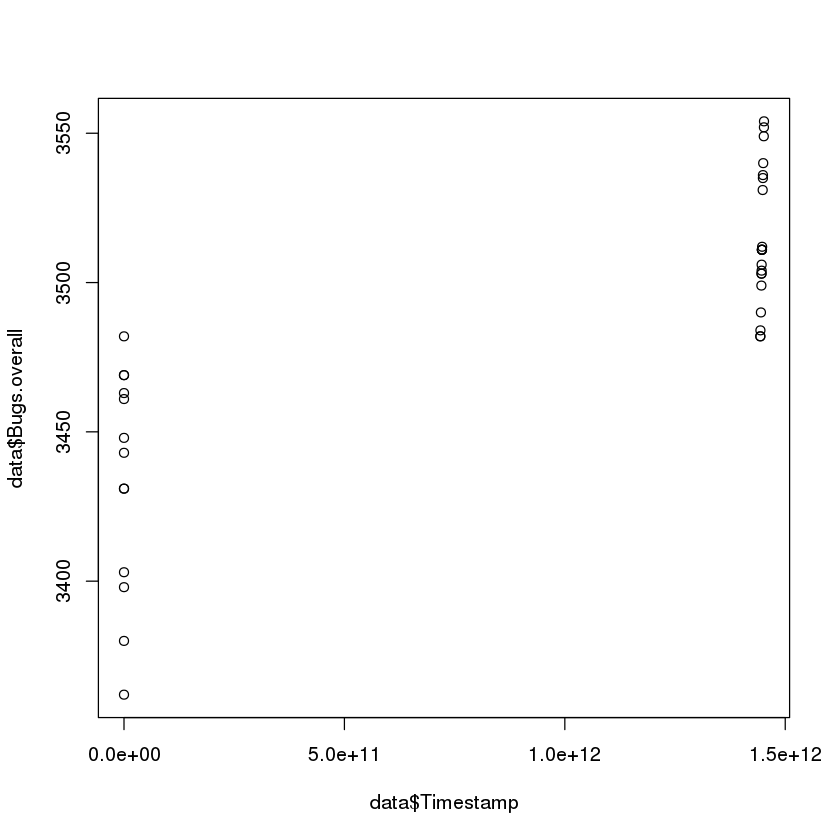

In [6]:
plot(data$Timestamp, data$Bugs.overall)

In [7]:
parse_date(data$Date, approx = TRUE)

 [1] "2015-05-31 23:44:00 UTC" "2015-06-20 23:59:00 UTC"
 [3] "2015-07-08 21:49:00 UTC" "2015-07-16 11:25:00 UTC"
 [5] "2015-08-09 23:56:00 UTC" "2015-08-10 10:21:00 UTC"
 [7] "2015-08-23 21:46:00 UTC" "2015-09-03 21:29:00 UTC"
 [9] "2015-09-11 21:26:00 UTC" "2015-09-13 14:40:00 UTC"
[11] "2015-09-17 21:24:00 UTC" "2015-09-20 22:17:00 UTC"
[13] "2015-09-29 12:35:00 UTC" "2015-09-29 12:46:00 UTC"
[15] "2015-09-29 12:47:00 UTC" "2015-10-01 16:07:00 UTC"
[17] "2015-10-14 21:28:00 UTC" "2015-10-26 22:14:00 UTC"
[19] "2015-10-29 13:48:00 UTC" "2015-10-30 22:36:00 UTC"
[21] "2015-11-02 06:26:00 UTC" "2015-11-02 19:16:00 UTC"
[23] "2015-11-09 08:20:00 UTC" "2015-11-10 09:23:00 UTC"
[25] "2015-11-10 14:37:00 UTC" "2015-11-10 14:39:00 UTC"
[27] "2015-11-15 12:31:00 UTC" "2015-11-29 21:24:00 UTC"
[29] "2015-12-05 17:42:00 UTC" "2015-12-06 22:55:00 UTC"
[31] "2015-12-13 21:39:00 UTC" "2015-12-28 22:01:00 UTC"
[33] "2016-01-01 17:33:00 UTC" "2016-01-03 14:31:00 UTC"

In [8]:
library(ggplot2)

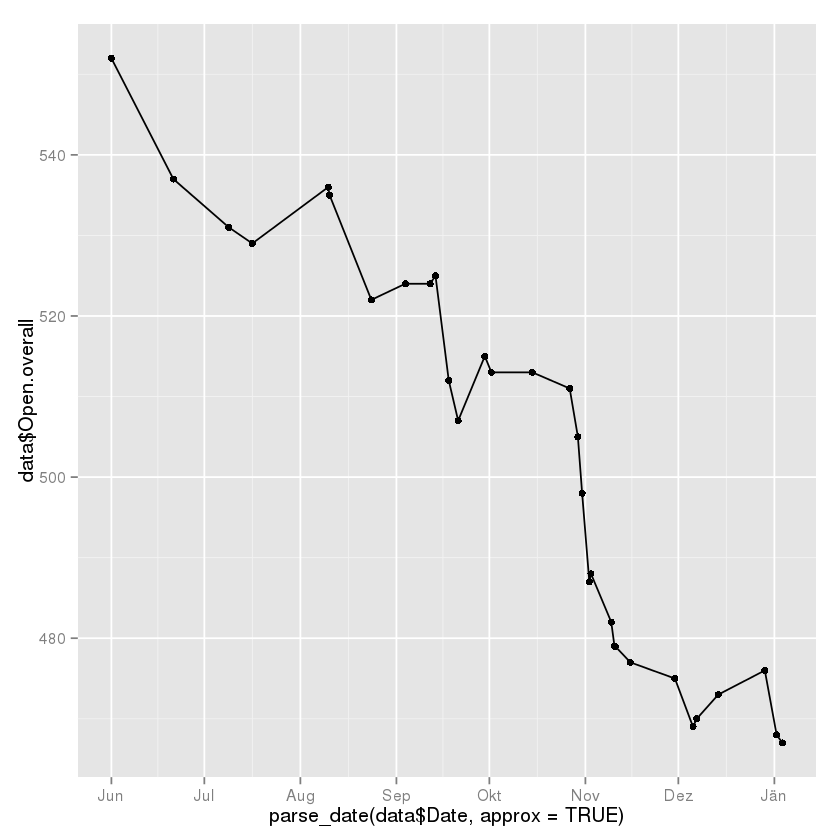

In [9]:
qplot(x=parse_date(data$Date, approx = TRUE), y=data$Open.overall) + geom_line() + geom_point()

In [10]:
?legend

legend {graphics},R Documentation
"x, y",the x and y co-ordinates to be used to position the legend. They can be specified by keyword or in any way which is accepted by xy.coords: See ‘Details’.
legend,a character or expression vector of length ≥ 1 to appear in the legend. Other objects will be coerced by as.graphicsAnnot.
fill,"if specified, this argument will cause boxes filled with the specified colors (or shaded in the specified colors) to appear beside the legend text."
col,the color of points or lines appearing in the legend.
border,the border color for the boxes (used only if fill is specified).
"lty, lwd",the line types and widths for lines appearing in the legend. One of these two must be specified for line drawing.
pch,"the plotting symbols appearing in the legend, as numeric vector or a vector of 1-character strings (see points). Unlike points, this can all be specified as a single multi-character string. Must be specified for symbol drawing."
angle,angle of shading lines.
density,"the density of shading lines, if numeric and positive. If NULL or negative or NA color filling is assumed."
bty,"the type of box to be drawn around the legend. The allowed values are ""o"" (the default) and ""n""."
